In [1]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 933.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s 

In [2]:
import gradio as gr
print(gr.__version__)

4.15.0


In [ ]:
import gradio as gr

def greet(name, intensity):
    return "Hello " * intensity + name + "!"

demo = gr.Interface(
    fn=greet,
    inputs=["text", "slider"],
    outputs=["text"],
)

demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3c99ca072386a596c2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

# Load your trained model
model_path = '/content/model.h5'
model = load_model(model_path)

# Function to preprocess an image and make predictions
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Assuming MobileNetV2 input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions)

    # Display the top prediction
    top_prediction = decoded_predictions[0][0]
    print(f"Predicted class: {top_prediction[1]}, Probability: {top_prediction[2]}")

    # Display the image
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Replace 'path/to/your/sample_image.jpg' with the actual path to your sample image
sample_image_path = '/content/1.jpg'
predict_image(sample_image_path)


1/1 [==============================] - 1s 1s/step


ValueError: `decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: (1, 100)

In [6]:
import pandas as pd

# Load the original CSV file
original_csv_path = '/content/classLabel.csv'  # Replace with your actual file path
df_original = pd.read_csv(original_csv_path)

# Create a new DataFrame with unique class labels
df_unique_classes = pd.DataFrame({'classLabel': df_original['classLabel'].unique()})

# Save the new DataFrame to a new CSV file
new_csv_path = '/content/classLabel1.csv'  # Replace with your desired file path
df_unique_classes.to_csv(new_csv_path, index=False)

num_records = len(df_unique_classes)
print(f"Number of Records: {num_records}")

# Display the new DataFrame
print("New CSV File:")
print(df_unique_classes)


Number of Records: 100
New CSV File:
                   classLabel
0                      ADONIS
1   AFRICAN GIANT SWALLOWTAIL
2              AMERICAN SNOOT
3                       AN 88
4                     APPOLLO
..                        ...
95                    VICEROY
96    WHITE LINED SPHINX MOTH
97                 WOOD SATYR
98        YELLOW SWALLOW TAIL
99            ZEBRA LONG WING

[100 rows x 1 columns]


1/1 [==============================] - 1s 1s/step
Predicted class: SOOTYWING


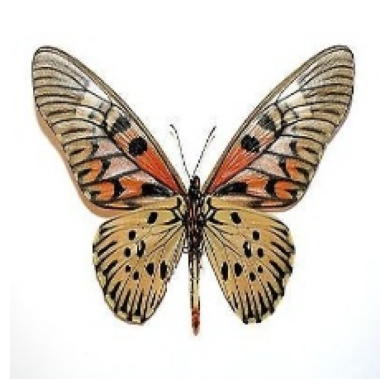

In [8]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load your trained model
model_path = '/content/model.h5'
model = load_model(model_path)

# Load class labels from CSV file
csv_file_path = '/content/classLabel1.csv'  # Replace with your actual file path
df_unique_classes = pd.read_csv(csv_file_path)
class_labels = df_unique_classes['classLabel'].tolist()

# Function to preprocess an image and make predictions
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Assuming MobileNetV2 input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    predictions = model.predict(img_array)

    # Custom decoding based on your model's classes
    top_prediction_index = np.argmax(predictions)
    top_prediction = class_labels[top_prediction_index]

    print(f"Predicted class: {top_prediction}")

    # Display the image
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Replace 'path/to/your/sample_image.jpg' with the actual path to your sample image
sample_image_path = '/content/1.jpg'
predict_image(sample_image_path)


In [9]:
import gradio as gr
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd

# Load the pre-trained MobileNetV2 model
model_path = '/content/model.h5'
loaded_model = tf.keras.models.load_model(model_path)

# Load the class labels from the CSV file
csv_file_path = '/content/classLabel1.csv'
class_labels_df = pd.read_csv(csv_file_path)

In [10]:
class_labels_df.head(5)

,classLabel
0,ADONIS
1,AFRICAN GIANT SWALLOWTAIL
2,AMERICAN SNOOT
3,AN 88
4,APPOLLO


In [15]:
import gradio as gr
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import pandas as pd
import numpy as np

# Load your trained model
model_path = '/content/model.h5'
model = load_model(model_path)

# Load class labels from CSV file
csv_file_path = '/content/classLabel1.csv'  # Replace with your actual file path
df_class_labels = pd.read_csv(csv_file_path)
class_labels = df_class_labels['classLabel'].tolist()

# Function to preprocess an image and make predictions
def predict_butterfly(img):
    # Preprocess the image
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make predictions using the loaded model
    predictions = model.predict(img_array)

    # Custom decoding based on your model's classes
    top_prediction_index = np.argmax(predictions)
    top_prediction = class_labels[top_prediction_index]

    return top_prediction

# Create Gradio interface
iface = gr.Interface(
    fn=predict_butterfly,
    inputs=gr.Image(),
    outputs=gr.Textbox(),  # Use Textbox for displaying text output
    live=True,
    title='Butterfly Classification',
    description='Upload an image of a butterfly to get the predicted class label.'
)

# Launch the Gradio app
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://403000338b32061b35.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
